In [1]:
# by Joh Schöneberg 2018/2019

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

In [2]:
# from https://stackoverflow.com/questions/10481990/matplotlib-axis-with-two-scales-shared-origin
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

# input data

In [3]:
#path = "/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/"
path = "/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/"


# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"sla1/"

allTracksFilename = 'all_tracks.csv'

outputpath = path_to_all_tracks_data

In [4]:
filenamesData = pd.read_csv(outputpath+allTracksFilename+"_allProcessedFilePaths.csv")
filenamesData[0:5]

,Unnamed: 0,filenames
0,0,/Users/johannesschoeneberg/git/DrubinBarnes/Ye...
1,1,/Users/johannesschoeneberg/git/DrubinBarnes/Ye...
2,2,/Users/johannesschoeneberg/git/DrubinBarnes/Ye...
3,3,/Users/johannesschoeneberg/git/DrubinBarnes/Ye...
4,4,/Users/johannesschoeneberg/git/DrubinBarnes/Ye...


In [5]:
# get all the data from the csv lifetimes, max intensities

trackIds = []
lifetimes_frames = []
lifetimes_seconds = []
maxIntensities = []
intensities_atAlignmentPoint_byDistance = []
intensities_atAlignmentPoint_byIntensity_raw = []
intensities_atAlignmentPoint_byIntensity_minMaxRescaled= []



filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    trackId = data['Trajectory'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    intensity_atAlignmentPoint_byDistance = data['inflectionPoint_fromDistance_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_raw = data['inflectionPoint_fromIntensity_raw_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_minMaxRescaled = data['inflectionPoint_fromIntensity_minMaxRescaled_Intensity'][0]
   
    
    trackIds.append(trackId)
    lifetimes_frames.append(lifetime_frames)
    lifetimes_seconds.append(lifetime_seconds)
    maxIntensities.append(max_intensity_AU)
    intensities_atAlignmentPoint_byDistance.append(intensity_atAlignmentPoint_byDistance)
    intensities_atAlignmentPoint_byIntensity_raw.append(intensity_atAlignmentPoint_byIntensity_raw)
    intensities_atAlignmentPoint_byIntensity_minMaxRescaled.append(intensity_atAlignmentPoint_byIntensity_minMaxRescaled)

# export these values into an excel
combinedDataFilePath = outputpath+allTracksFilename+'_allProcessedFiles_summary.csv'
print(combinedDataFilePath)
df = pd.DataFrame()
df['trackIds'] = trackIds
df['lifetimes_frames'] = lifetimes_frames
df['lifetimes_seconds'] = lifetimes_seconds
df['maxIntensities'] = maxIntensities
df['intensities_atAlignmentPoint_byDistance'] = intensities_atAlignmentPoint_byDistance
df['intensities_atAlignmentPoint_byIntensity_raw'] = intensities_atAlignmentPoint_byIntensity_raw
df['intensities_atAlignmentPoint_byIntensity_minMaxRescaled'] = intensities_atAlignmentPoint_byIntensity_minMaxRescaled
df.to_csv(combinedDataFilePath)

/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/all_tracks.csv_allProcessedFiles_summary.csv


# Lifetime Distributions

In [6]:
print(lifetimes_frames)

[66, 44, 35, 30, 42, 41, 33, 28, 44, 64, 92]


/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/plot_lifetime_frames_distribution.png


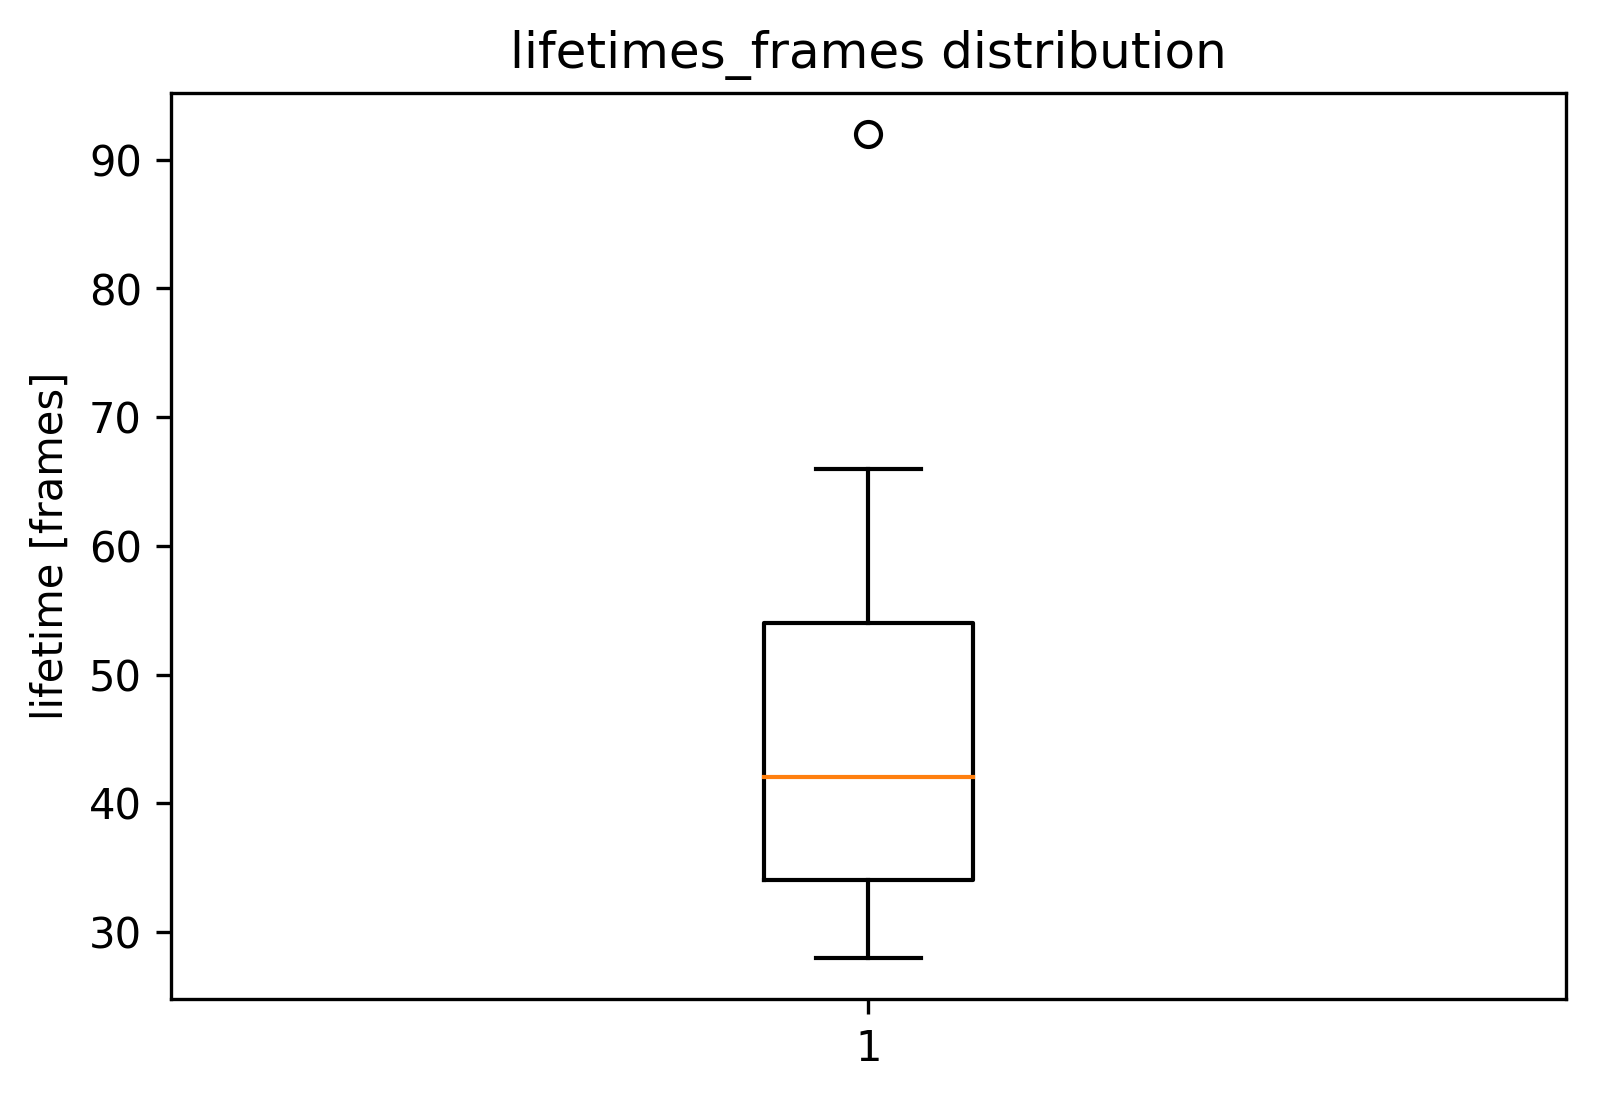

In [7]:
plt.figure(dpi=300)
plt.boxplot(lifetimes_frames)
plt.title('lifetimes_frames distribution')
plt.ylabel('lifetime [frames]')
outputFigurePath= outputpath+"plot_lifetime_frames_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/plot_lifetime_seconds_distribution.png


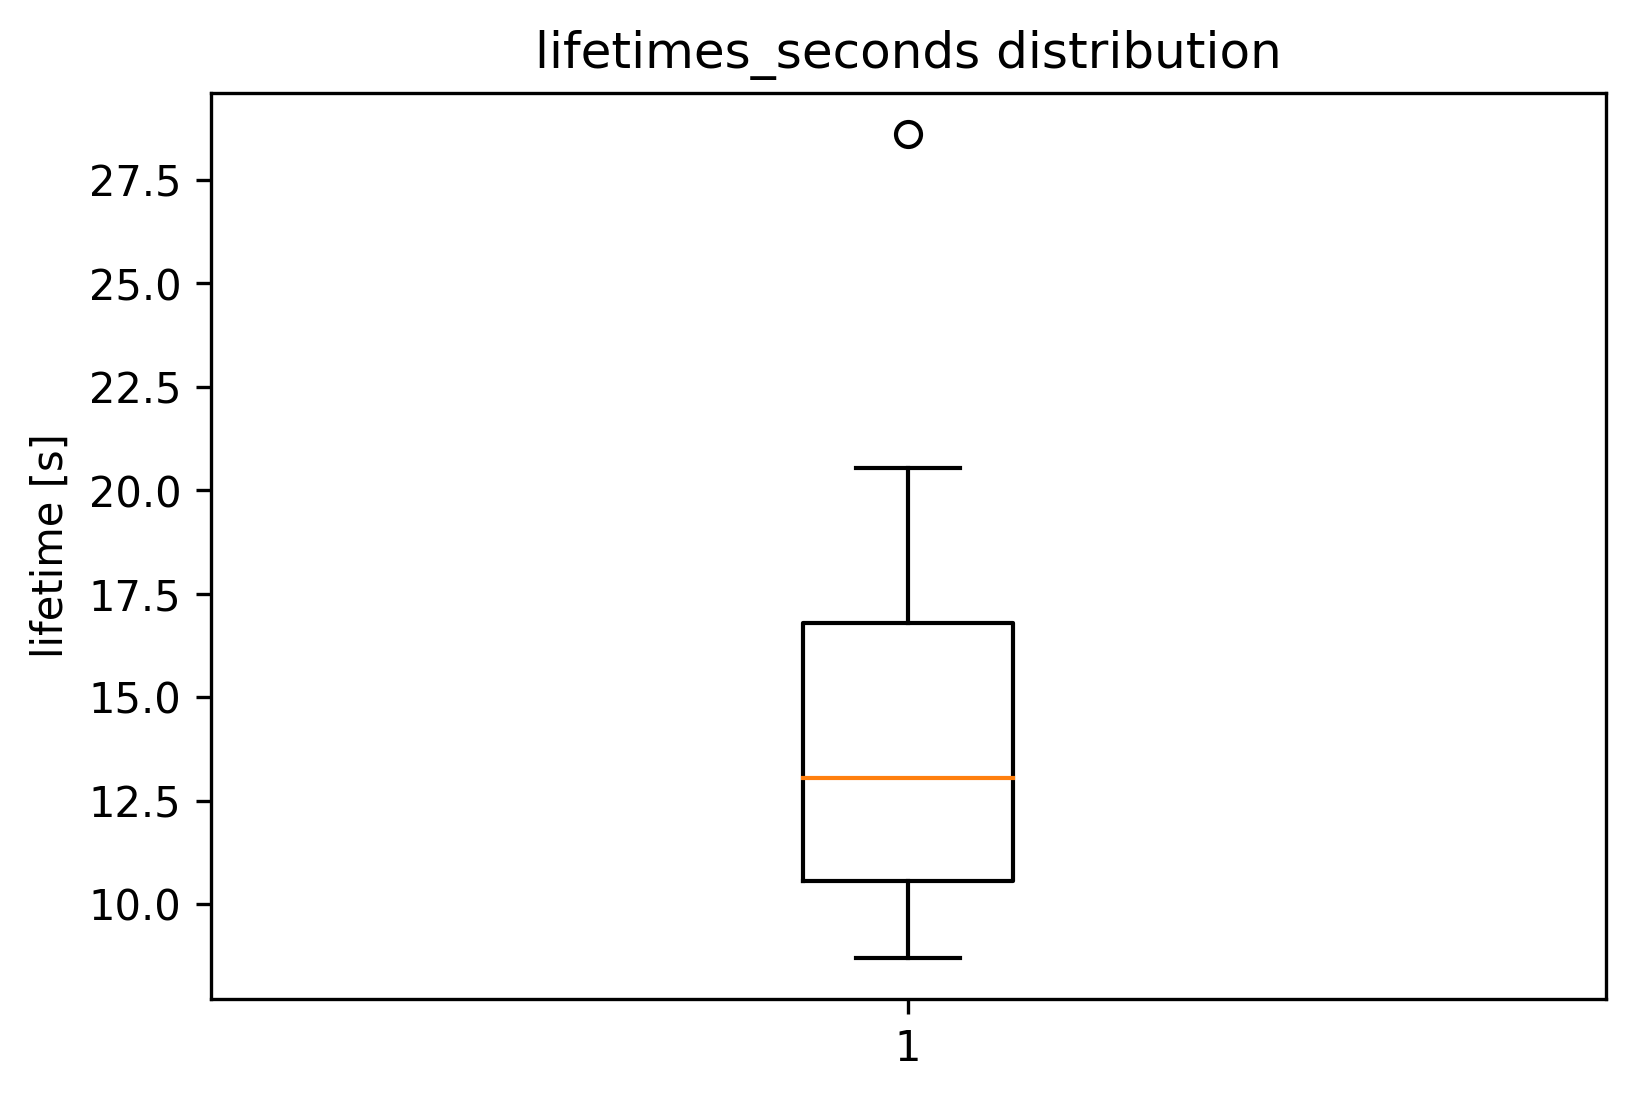

In [8]:
plt.figure(dpi=300)
plt.boxplot(lifetimes_seconds)
plt.title('lifetimes_seconds distribution')
plt.ylabel('lifetime [s]')
outputFigurePath= outputpath+"plot_lifetime_seconds_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Max Intensity Distribution

/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/plot_maxIntensity_distribution.png


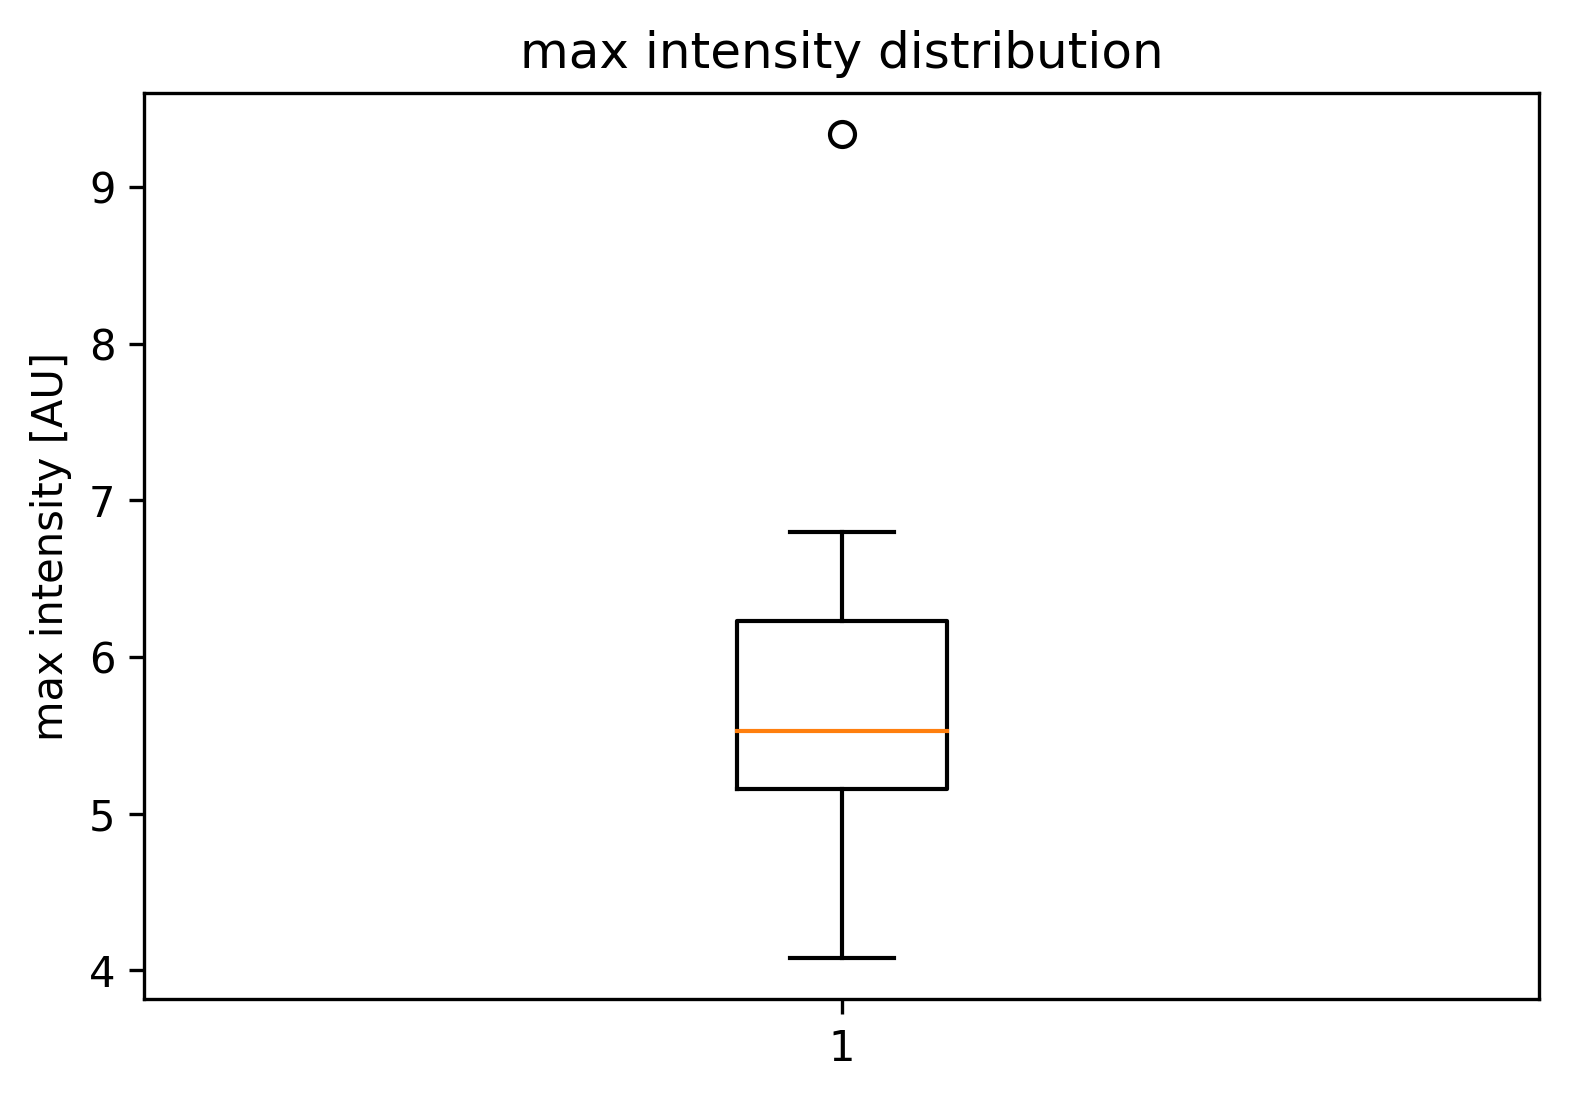

In [9]:
plt.figure(dpi=300)
plt.boxplot(maxIntensities)
plt.title('max intensity distribution')
plt.ylabel('max intensity [AU]')
outputFigurePath= outputpath+"plot_maxIntensity_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Intensities At Alignment Point

/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/plot_intensity_distribution_at_alignment_by_distance.png


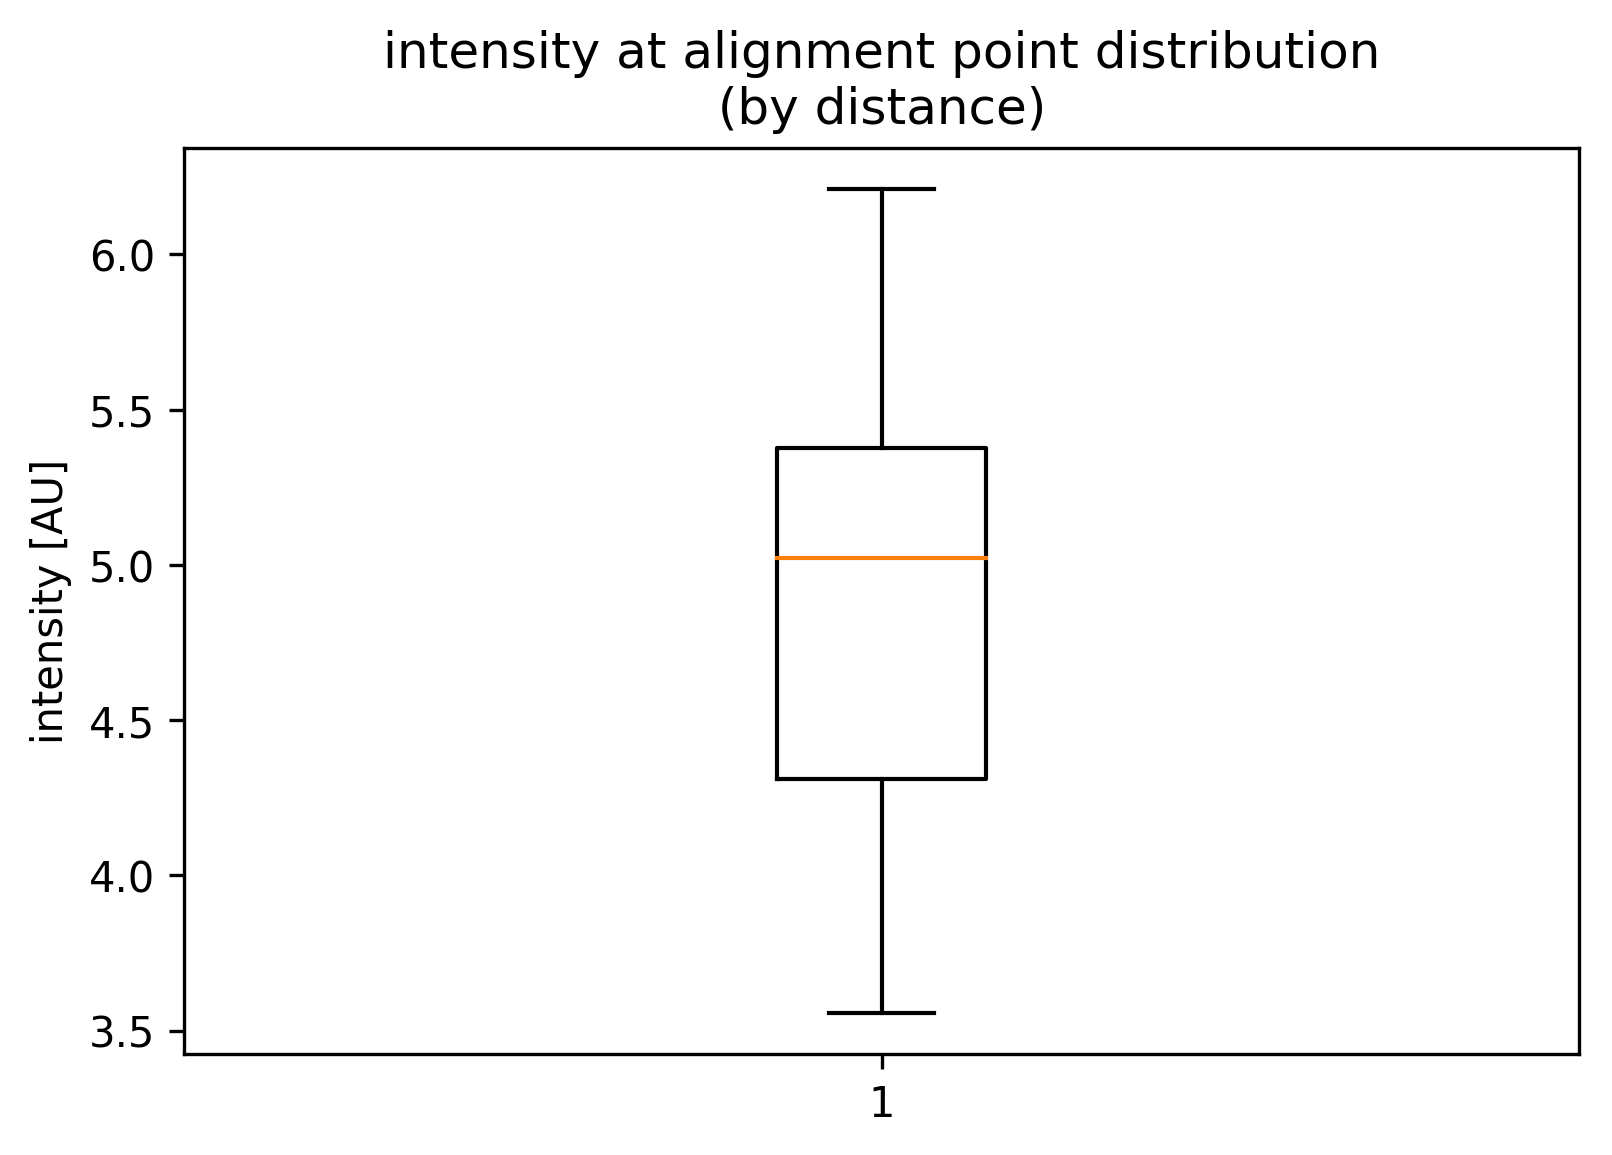

In [10]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byDistance)
plt.title('intensity at alignment point distribution\n(by distance)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_distance.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/plot_intensity_distribution_at_alignment_by_intensity_raw.png


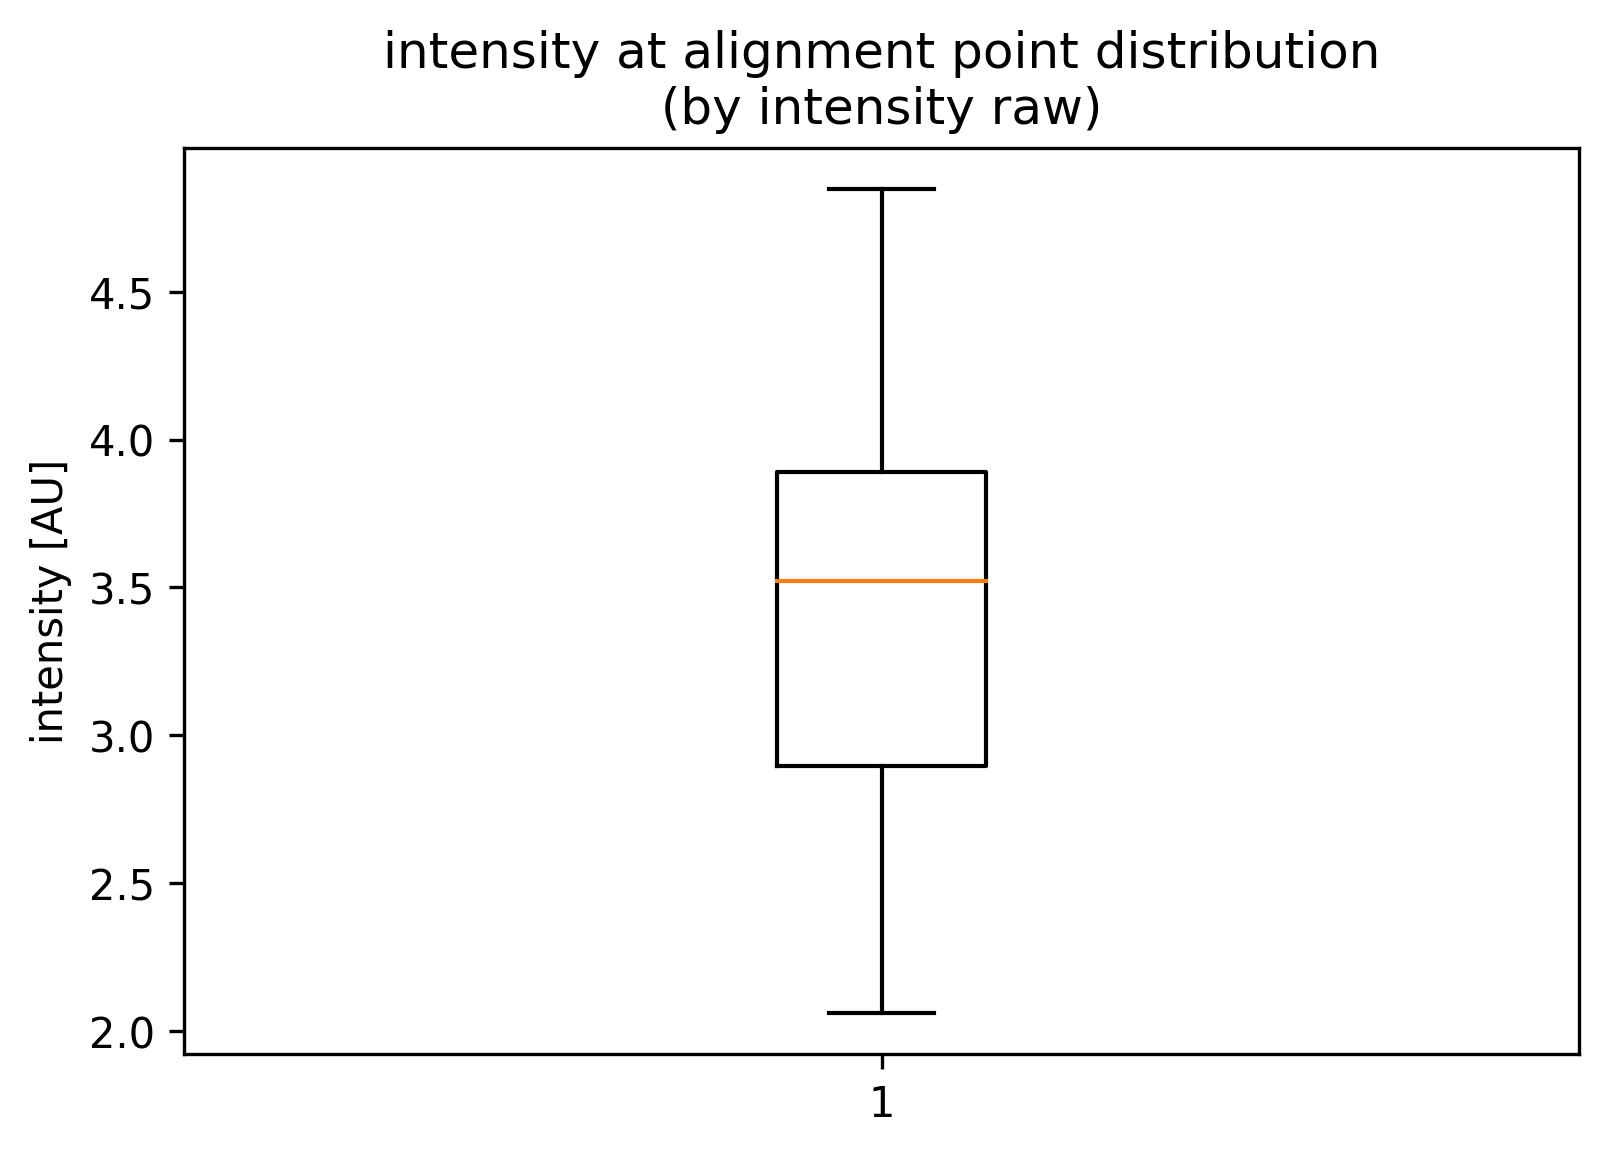

In [11]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byIntensity_raw)
plt.title('intensity at alignment point distribution\n(by intensity raw)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_intensity_raw.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/plot_intensity_distribution_at_alignment_by_intensity_minMaxRescaled.png


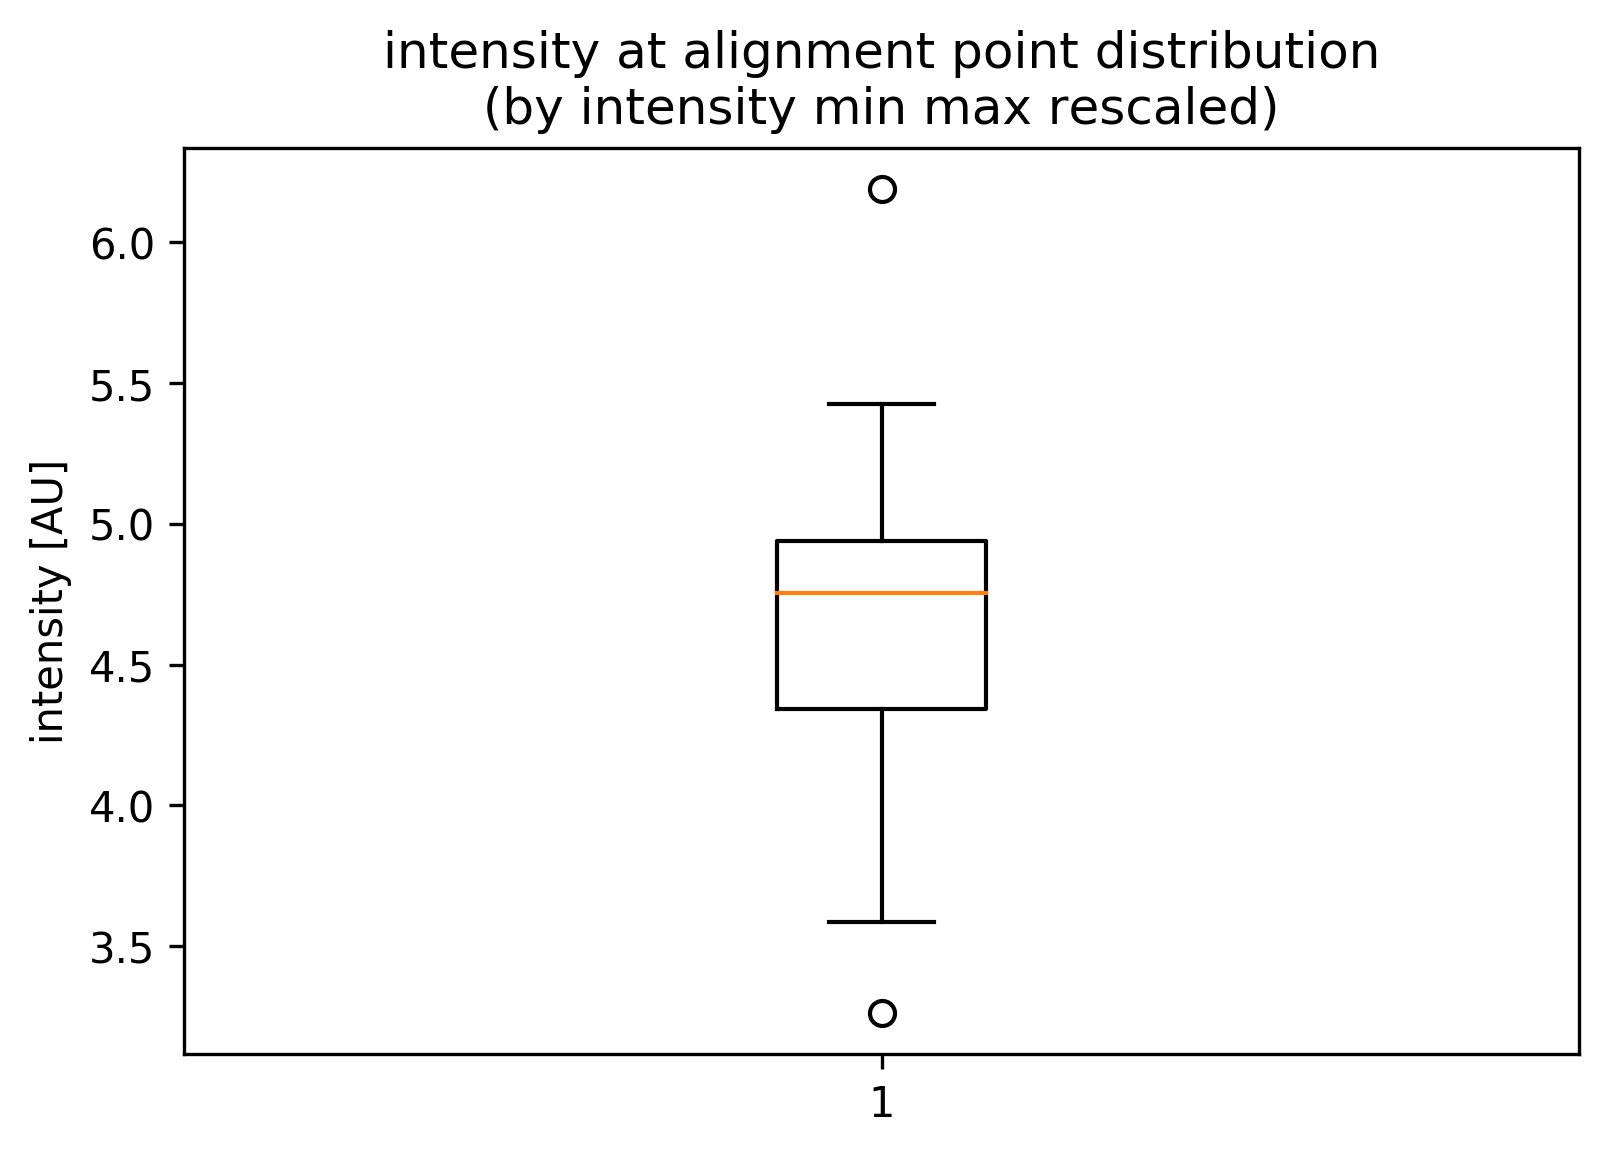

In [12]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byIntensity_minMaxRescaled)
plt.title('intensity at alignment point distribution\n(by intensity min max rescaled)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_intensity_minMaxRescaled.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/sla1/plot_intensity_distribution_at_alignment_by_dist_and_intensity.png


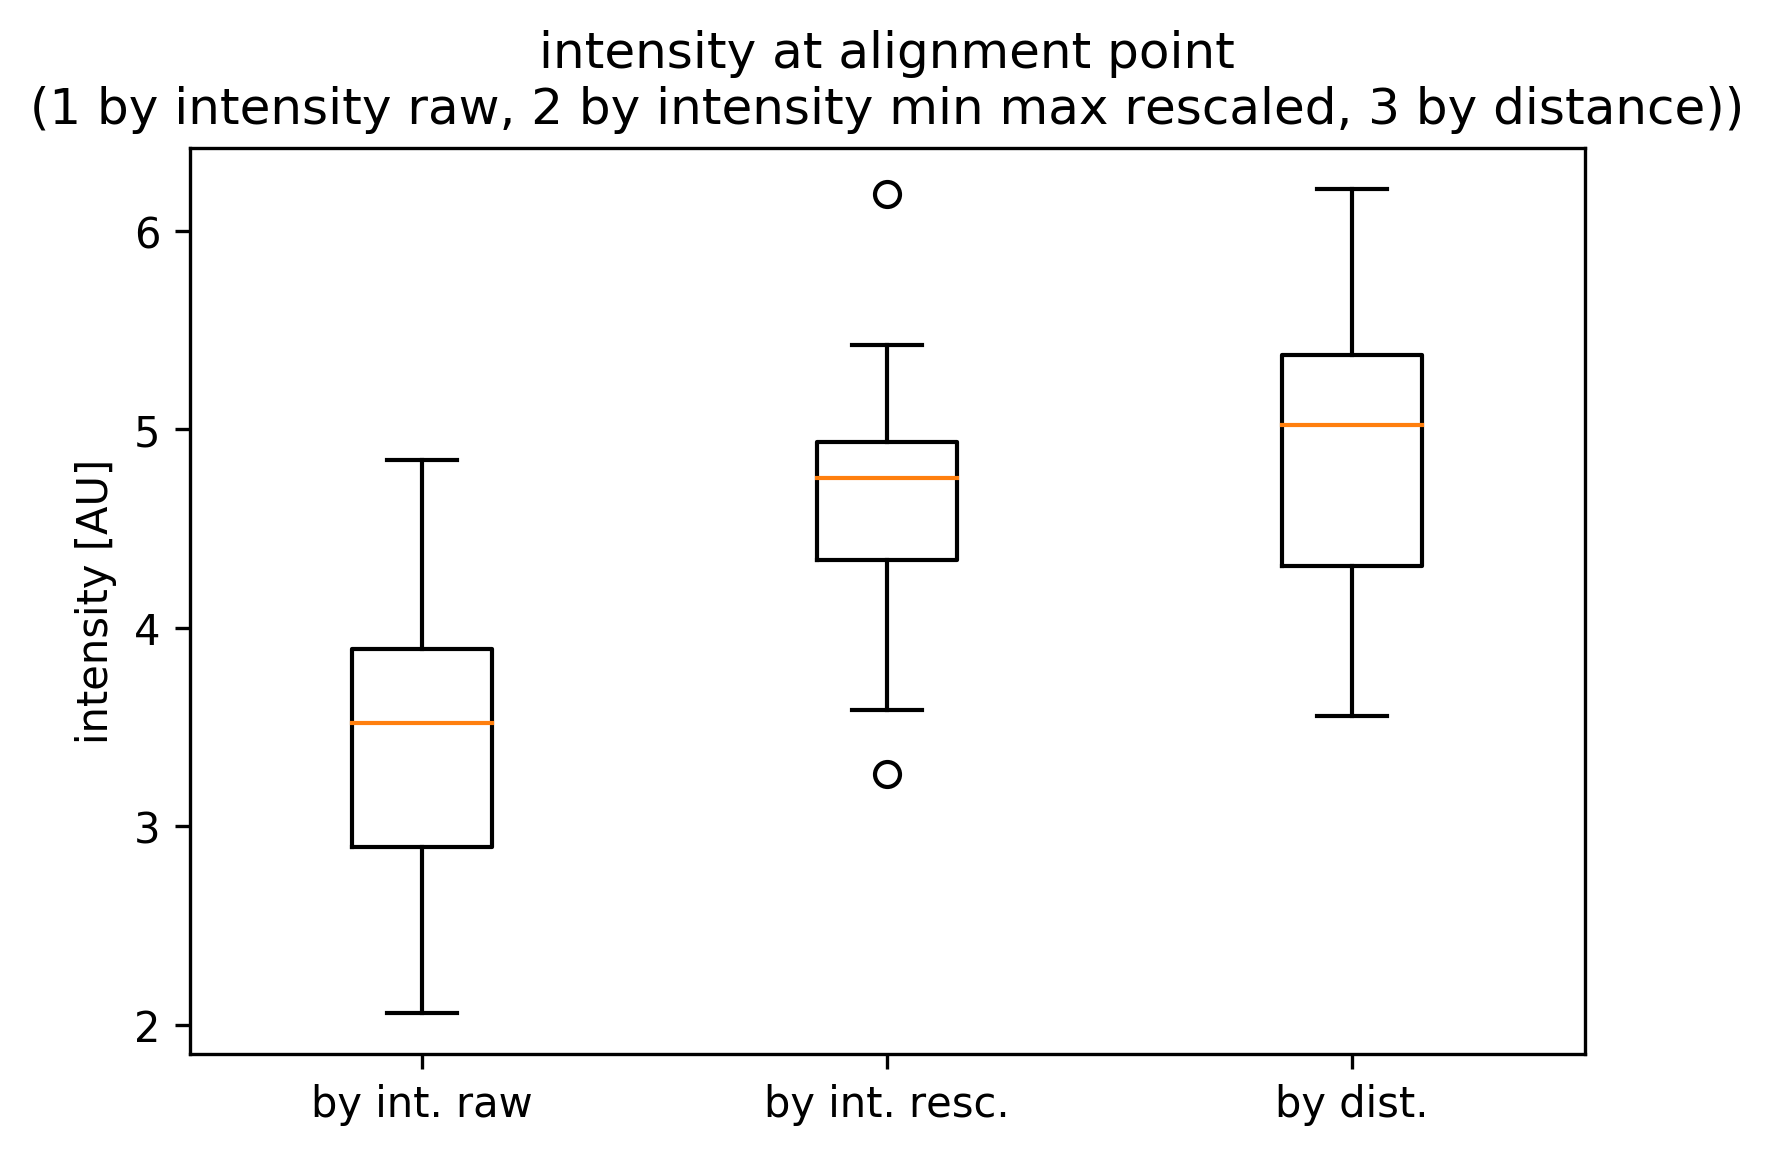

In [13]:
plt.figure(dpi=300)
plt.boxplot([intensities_atAlignmentPoint_byIntensity_raw,intensities_atAlignmentPoint_byIntensity_minMaxRescaled,intensities_atAlignmentPoint_byDistance])
plt.title('intensity at alignment point\n(1 by intensity raw, 2 by intensity min max rescaled, 3 by distance))')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_dist_and_intensity.png"
print(outputFigurePath)
#plt.xticklabels(["1","1","1"],rotation=45, fontsize=8)
plt.xticks([1, 2, 3], ['by int. raw', 'by int. resc.', 'by dist.'])
plt.savefig(outputFigurePath)